In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

type(data)

sklearn.utils._bunch.Bunch

In [3]:
data.keys()

# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


data.data.shape

# (569, 30)


data.target # 0 : 악성 (암), 1 : 양성 (전이되지 않는)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
data.target_names

# array(['malignant', 'benign'], dtype='<U9')


data.target.shape

# (569,)


data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# test size를 33%로 데이터로 나누시고, 데이터를 정규화 하세요.

# 데이터를 67% 학습용, 33% 테스트용으로 나눔
# X: 입력 데이터 (특성), y: 정답 (타겟)
X_train, X_test, y_train, y_test = train_test_split(
    data.data,     # 입력 데이터 (2차원 배열)
    data.target,   # 정답 (1차원 벡터)
    test_size=0.33,  # 테스트 데이터 비율 (33%)
    )

# 데이터 차원 확인
N, D = X_train.shape  # N: 학습 샘플 수, D: 특성 수
# 정규화를 위한 객체 생성
scaler = StandardScaler()

# 학습 데이터에 대해 평균과 표준편차를 계산하고 변환
X_train = scaler.fit_transform(X_train)
# 테스트 데이터도 같은 방식으로 정규화 적용 (fit이 아닌 transform만!)
X_test = scaler.transform(X_test)

In [6]:
# 모델 정의: 입력 차원 D → 출력 1개 → 시그모이드 함수 적용
model = nn.Sequential(
    nn.Linear(D, 1),     # 선형 계층: 입력 D개, 출력 1개 (y = Wx + b)
    nn.Sigmoid()         # 시그모이드 활성화 함수: 출력값을 0~1 범위로 제한 (확률처럼 사용)
)
# 이 모델은 "이 샘플이 클래스 1일 확률이 얼마인가?" 를 예측하는 이진 분류기
# 예: 출력이 0.8이면, "이 샘플이 양성(1)일 확률이 80%" 라는 뜻

In [7]:
# 손실 함수 설정 (Binary Cross Entropy Loss)
# 이진 분류 문제에서는 MSELoss가 아닌 BCELoss (Binary Cross Entropy)를 사용
criterion = nn.BCELoss()

# 모델의 학습 가능한 파라미터(model.parameters())를 인자로 넘겨
# Adam 옵티마이저를 사용하여 모델을 학습시킬 준비를 함
optimizer = torch.optim.Adam(model.parameters())

In [8]:

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)


n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs) :
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)
  loss.backward() # backward가 없어도 됨
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[it] = loss.item() # iterate 반복
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')

Epoch 50/1000, Train Loss: 0.4886, Test Loss: 0.4921
Epoch 100/1000, Train Loss: 0.3660, Test Loss: 0.3595
Epoch 150/1000, Train Loss: 0.2977, Test Loss: 0.2893
Epoch 200/1000, Train Loss: 0.2534, Test Loss: 0.2454
Epoch 250/1000, Train Loss: 0.2225, Test Loss: 0.2150
Epoch 300/1000, Train Loss: 0.1998, Test Loss: 0.1927
Epoch 350/1000, Train Loss: 0.1825, Test Loss: 0.1756
Epoch 400/1000, Train Loss: 0.1688, Test Loss: 0.1620
Epoch 450/1000, Train Loss: 0.1577, Test Loss: 0.1510
Epoch 500/1000, Train Loss: 0.1486, Test Loss: 0.1419
Epoch 550/1000, Train Loss: 0.1409, Test Loss: 0.1342
Epoch 600/1000, Train Loss: 0.1343, Test Loss: 0.1276
Epoch 650/1000, Train Loss: 0.1286, Test Loss: 0.1219
Epoch 700/1000, Train Loss: 0.1237, Test Loss: 0.1169
Epoch 750/1000, Train Loss: 0.1193, Test Loss: 0.1125
Epoch 800/1000, Train Loss: 0.1154, Test Loss: 0.1086
Epoch 850/1000, Train Loss: 0.1118, Test Loss: 0.1051
Epoch 900/1000, Train Loss: 0.1087, Test Loss: 0.1020
Epoch 950/1000, Train Loss: 0

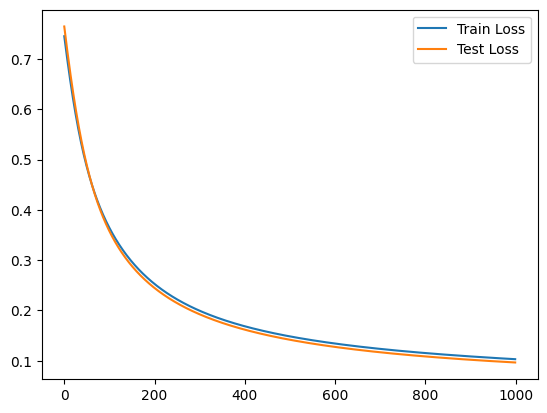

In [9]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')

plt.legend()
plt.show()

In [10]:
# accuracy를 계산해주세요
# train 이랑 test 두개를 따로 구해놓고
# 예측치는 round(>= 0.5로 할랬는데 둘 다 상관 없댔음)

# train 데이터
y_pred_train = model(X_train)
y_pred_train = y_pred_train.detach().numpy()  # 텐서를 numpy로 변환..이거 자꾸 안해서 에러남 ㅠ
y_train_np = y_train.detach().numpy()

# test 데이터
y_pred_test = model(X_test)
y_pred_test = y_pred_test.detach().numpy()
y_test_np = y_test.detach().numpy()

# 예측값을 0 또는 1로 반올림
y_pred_train_label = np.round(y_pred_train)
y_pred_test_label = np.round(y_pred_test)

# 정확도 계산 (True → 1, False → 0 이므로 평균을 내면 정확도)
train_acc = np.mean(y_pred_train_label == y_train_np)
test_acc = np.mean(y_pred_test_label == y_test_np)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.9816
Test Accuracy: 0.9840


In [11]:
# 교수님 방법!

# accuracy 계산 (train, test)
# np.mean(True, False)
# Train accuracy, Test Accuracy

# gradient를 끊어줘야,, tensor 형식에서 벗어나야 소수점 형식을 바꿀 수가 있어서
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train) # true, false,, 몇 퍼센트인지를

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.9816, Test acc: 0.9840


In [12]:
torch.save(model.state_dict(), 'mymodel.pt')

!ls
# 결과값 : mymodel.pt  sample_data

mymodel.pt  sample_data


In [13]:
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('mymodel.pt'))


<All keys matched successfully>

In [15]:
with torch.no_grad():
  p_train2 = model2(X_train)
  p_train2 = np.round(p_train2.numpy())
  train_acc2 = np.mean(y_train.numpy() == p_train2)

  p_test2 = model2(X_test)
  p_test2 = np.round(p_test2.numpy())
  test_acc2 = np.mean(y_test.numpy() == p_test2)
print(f'Train acc2: {train_acc2:.4f}, Test acc2: {test_acc2:.4f}')

Train acc2: 0.9816, Test acc2: 0.9840


In [16]:
# 이 환자는 악성 유방암으로 예측됩니다
# 이 환자는 양성 종양으로 예측됩니다
# 이 중에 하나로 출력되게 하려면? 예측이 0이면 유방암,1이면 종양이자나

In [17]:
data = [17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871,
        1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193,
        25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]

In [18]:
# 힌트! 정규화 먼저하고 그 다음이 데이터 타입 변환이다


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


data_np = np.array(data, dtype=np.float32).reshape(1, -1)
X_input = torch.from_numpy(data_np)


with torch.no_grad():
    pred = model(X_input)
    pred_label = int(np.round(pred.numpy()))



if pred_label == 0:
    print("이 환자는 악성 유방암으로 예측됩니다.")
else:
    print("이 환자는 양성 종양으로 예측됩니다.")


이 환자는 악성 유방암으로 예측됩니다.


<ipython-input-18-e89b50c277c8>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_label = int(np.round(pred.numpy()))


In [19]:
# 교수님 방법!

new_patient = np.array([[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]])

new_patient_scaled = scaler.transform(new_patient)

new_patient_tensor = torch.from_numpy(new_patient_scaled.astype(np.float32))

with torch.no_grad():
  prediction = model(new_patient_tensor)
  prediction_label = (prediction.item() >= 0.5)
  print(prediction.item())

if prediction_label:
  print("이 환자는 양성 종양으로 에측됩니다.")
else:
  print("이 환자는 악성 유방암으로 예측됩니다.")

0.0
이 환자는 악성 유방암으로 예측됩니다.


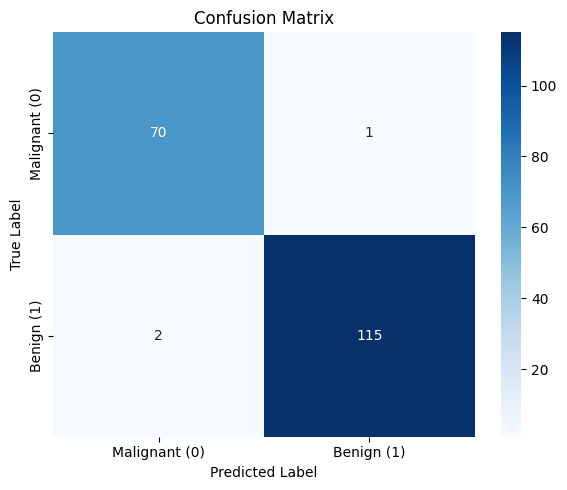

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

with torch.no_grad():
  y_pred_test = model(X_test)
  y_pred_test = np.round(y_pred_test.numpy())
  y_true_test = y_test.numpy()

cm = confusion_matrix(y_true_test, y_pred_test)

plt.figure(figsize=(6, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Malignant (0)", "Benign (1)"],
            yticklabels=['Malignant (0)', 'Benign (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()